Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY**</u> | <u>**Prelim Examination**</u>
**Name** | Cuevas, Christian Jay L.
**Section** | CPE32S3
**Date Performed**: | 3/26/24
**Date Submitted**: | 3/26/24
**Instructor**: | Engr. Roman M. Richard  

<hr>

## ***INSTRUCTIONS:***

In this assignment, you are task to build a multilayer perceptron model. The following are the requirements:
*   Choose any dataset
*   Explain the problem you are trying to solve
*   Create your own model
*   Evaluate the accuracy of your model




## ***DATASET:***
* The dataset that I am using is from UCI Machine Learning Repository and it is about identifying spam messages using different combinations of words. These words are the features of the dataset, they were collected in spam emails and are the features of this dataset. This dataset was collected from a personal email so the indicator of "not spam" is the word "george" and the area code "650".

<img src = "https://assets-global.website-files.com/659415b46df8ea43c3877776/65a52bf7802d8418a2047245_email-marketing-spam-folder-88fcca5f.jpeg">

*Image for visualization only*



## ***PROBLEM:***

* The problem we're trying to solve is the identification of spam emails and legitimate emails by using the multilayer perceptron model and the different words as features that will be used in training the model. This can be useful in creating a personal spam filter that can be used in personal emails.

## ***CODING:***

#### ***IMPORTING LIBRARIES AND DATASET:***

In [1]:
pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation


In [3]:
#Fetch the dataset from UCI repository
#94 is the id of our dataset Spambase
spambase = fetch_ucirepo(id=94)

In [4]:
#Get the original data from the UCI Repository
#This contains all the labels, features, and target variable
all_data = spambase.data.original

#### ***EXPLORATORY DATA ANALYSIS:***

* The first step is to look at the number of features, number of columns, and data types.

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

<hr>

**Observation**:

* As you can see above, this dataset has a total of 58 attributes and 55 of them are float64 and 3 are int64 data types. If we scan the null count, we can see that there are no missing data, but we will further confirm that later. Additionally, we have a total of 4601 data entries.

<hr>

* Check if there is a null value in the dataset.

In [6]:
all_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

<hr>

**Observation**:

* You can observe above that there is no null values in the given dataset. This makes it easier because we do not have to fill or drop missing values.

<hr>

* Look at the first 5 rows of the dataset to check the values of the data.

In [7]:
all_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<hr>

**Observation**:

* here we can increase our understanding with our data, by looking at the value of our data, we can see that it contains floating values. These floating values represent the percentage of words that match the specified word or char in the e-mail. For example the "word_freq_all" column has a value of 0.64 in the first column, this means that the word "all" appeared in the e-mail with a frequency of 64%. There are words that have 0%, this means that they did not appear in that e-mail message. Also, the class has binary value of 0 and 1, 0 means it is not spam while 1 means it is a spam.


<hr>

* To further observe the data, let us use .describe(). This returns count, mean, std, min, 25%, 50%, 75% and max.
* This can help in proving that all of the values are in the range of 0 - 1, which can help in identifying outliers.

In [9]:
all_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


<hr>

**Observation**:

* We can observe that the minimum and maximum value of our data is in the range of 0 - 1, which proves the claim and validity of this dataset.

<hr>

* Now, after observing the features or attributes of this dataset, we also need to look at the target variables.

[Text(0, 0, '2788'), Text(0, 0, '1813')]

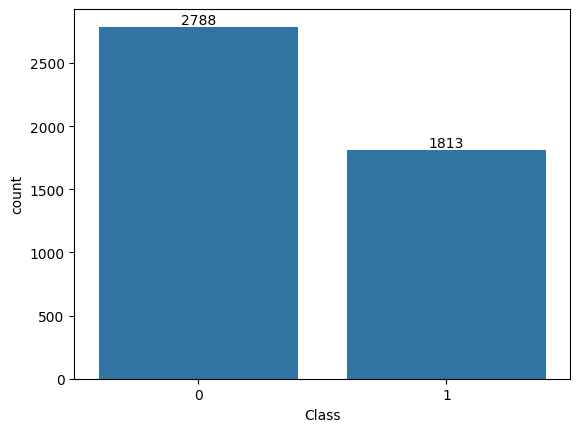

In [11]:
ax = sns.countplot(data=all_data, x='Class')
ax.bar_label(ax.containers[0])

<hr>

**Observation**:

* You can observe that the instance of the class "not spam" is higher than the instance of the class "spam". The number of not spam instances is 2788 while the number of mines instances is 1813.

* Why do we need to check for imbalance? We check for class imbalance because this can affect the predictive performance of our model [2] and it can also produce bias when the model is making a decision [1,2].

* To check for the degree of imbalance, we can use the Imbalance Ratio, which is denoted by IR = total of negative class / total of positive class [1]. Positive class is the class we're testing for [3] which is the "spam" class, and the negative class is the class is the other possibility that our model is also testing [4].

* In our case, IR = 2788 / 1813 is equal to 1.5377, which is close to 1. When the result of the ratio is close to 1, this means that our class is not imbalanced [5].


<hr>

* We need to also check for their correlation to find out if there is a correlation between the features and the target variable.

In [12]:
all_data.corr(method="pearson", numeric_only = True)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


In [18]:
all_data.corr(method="pearson", numeric_only = True)['Class'].sort_values(ascending=False)

Class                         1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

<hr>

**Observation**:

* We can see in the results above that there is a medium positive correlation between the attributes which is between the values 0.3 - 0.5 [6]. There is also a weak negative correlation in certain attributes ranging from -0.1 - -0.3 [6]. This means that there is a weak correlation between the attributes and the target variable "class".

<hr>

<Axes: >

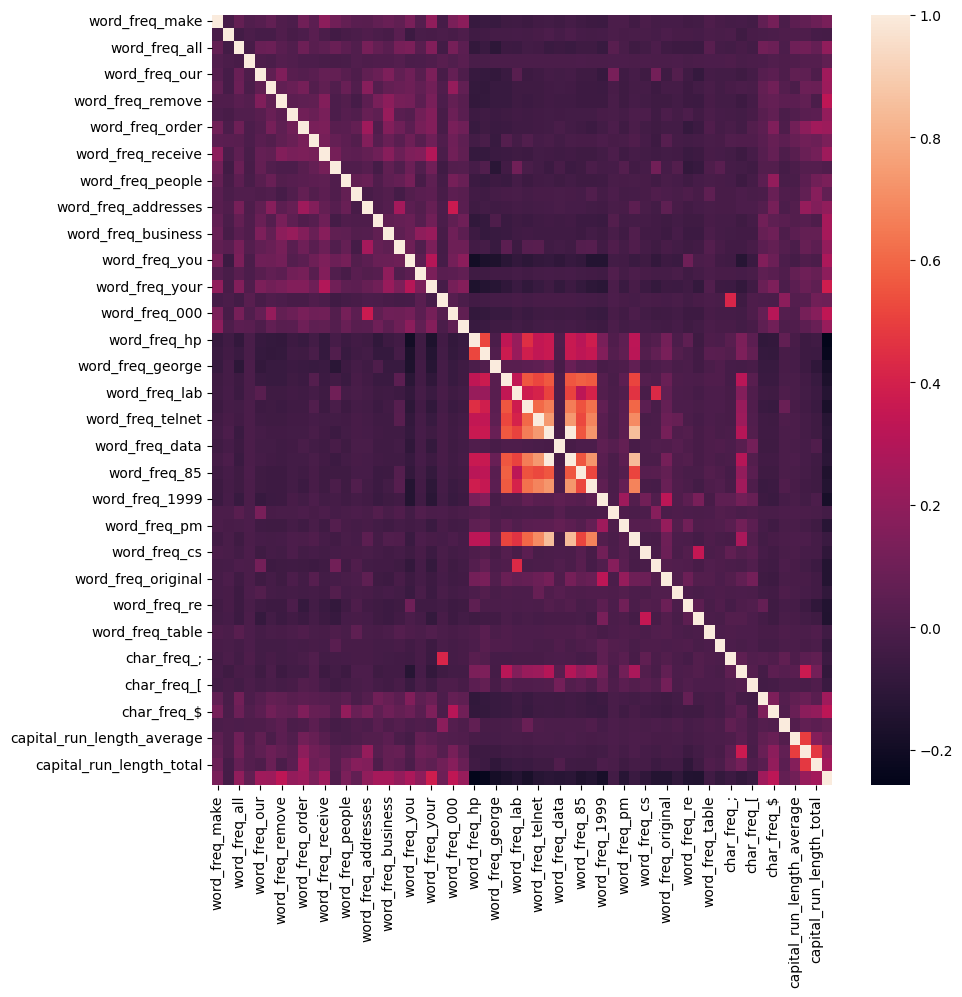

In [17]:
fig = plt.figure(figsize=(10,10), dpi=100)

sns.heatmap(all_data.corr())

<hr>

**Observation**:

* Here, we observe in this heatmap that it is brighter in the middle part of the heatmap along the diagonal line. This means that there is a high correlation between the attributes closer to each other. Regarding the target variable "Class", we can't see it in the heatmap but according to the descending order of correlation displayed above, word_freq_your has the highest correlation with it with 38% frequency.

<hr>

#### ***SPLITTING THE DATASET INTO TRAINING, VALIDATION AND TEST DATA:***

* Splitting the dataset into training and test data is very important because it will show the predictive power of our model. The training data will be used to train the model and the testing data will be used to test the final model [7]. Validation data on the other hand is used during the training of our model and it is the subset where we initially validate the trained model, before using the test data [8].

* The data will be split to 60/20/20, where 60 will be the training data, 20 will be the validation data, and 20 will be the test data [9, 10].

In [19]:
X = all_data.drop(["Class"], axis = 1)
y = all_data["Class"]

X, X_test, y, y_test = train_test_split(X, y, test_size =0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.2, random_state=10)

In [20]:
X_train.shape, X_test.shape, X_val.shape

((2944, 57), (921, 57), (736, 57))

In [21]:
y_train.shape, y_test.shape, y_val.shape

((2944,), (921,), (736,))

#### ***TRAINING THE MODEL:***

* We're using Multilayer Perceptron model to train our training dataset. MLP is a very powerful tool that is effective in non linear dataset [11]. It consists of the input layer, hidden layer(s), and the output layer [11]. There are nodes in each layer which has values and weights, the values are from the dataset but the weights are composed of heuristics or random values [12]. The model learns with back propagation and gradient descent.

* Our input layer will be consisting of 60 nodes which are the 60 features that we have, and the weights will be random.

* How do we decide the number of nodes in the hidden layers? The rule of thumb is that the number of nodes in the hidden layer is 2/3 of the input layer and less than of the twice the input layer [13]. The number of the nodes in the hidden layer is 40.

* The number of the nodes in our output layer is 1, if the value is 0 it means it is the class "Rock" and if the value is 1 it means it is the class "Mines".

* I used Rectified Linear Unit because it is the most recommended one in multilayer perceptron model [14].

In [145]:
#Initial model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(57),
    tf.keras.layers.Dense(38, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [146]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics=["accuracy"]
              )

* The number of epochs is arbitrary and will be adjusted accordingly after observing the graph of loss.
* The number of batch size is 32 because it is a good default value [16].

In [147]:
spam_data = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, batch_size = 32)

Epoch 1/50
92/92 [==============================] - 1s 5ms/step - loss: 3.1699 - accuracy: 0.6179 - val_loss: 0.7299 - val_accuracy: 0.7622
Epoch 2/50
92/92 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.8013 - val_loss: 0.6353 - val_accuracy: 0.8084
Epoch 3/50
92/92 [==============================] - 0s 2ms/step - loss: 0.9000 - accuracy: 0.8274 - val_loss: 0.8656 - val_accuracy: 0.8465
Epoch 4/50
92/92 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.8308 - val_loss: 1.1883 - val_accuracy: 0.7908
Epoch 5/50
92/92 [==============================] - 0s 2ms/step - loss: 1.0886 - accuracy: 0.8305 - val_loss: 0.5897 - val_accuracy: 0.8764
Epoch 6/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8937 - val_loss: 0.2620 - val_accuracy: 0.9090
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 1.2932 - accuracy: 0.8390 - val_loss: 0.7437 - val_accuracy: 0.8696
Epoch 8/50
92/92 [==

<hr>

**Observation**:

* We can observe here that the final accuracy of our model trained from the training data is 92.39% with 27.16% loss. When tested to the validation data, it has a final accuracy of 94.028% and loss of 22.68%. We can observe here that our model is well-fitted with our training data because the accuracy of our trained model to the validation data has a small gap of 2% when compared to its accuracy to the training data. Also, the loss is decreasing for both the training data and validation data.

<hr>

#### ***EVALUATING THE MODEL:***

In [148]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.9381


[0.2582319378852844, 0.9381107687950134]

<hr>

**Observation**:

* Here, we can see that when tested with out actual test data, the accuracy is 95.005% and with loss of 14.67%. This is a very good accuracy and the loss is acceptable but can be further improved by optimizing the model. The accuracy of model testing is higher than training and validation data, which means that this model is not overfitted.

<hr>

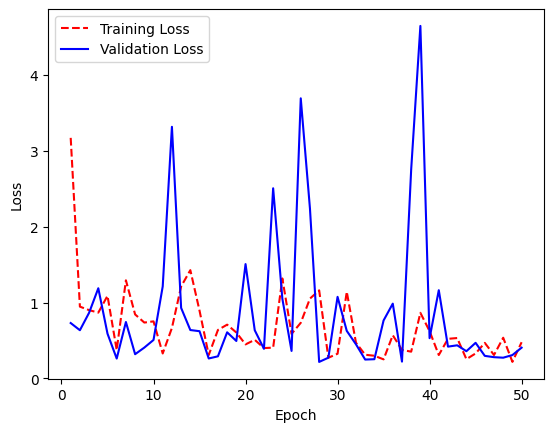

In [149]:
def showLossGraph(model):
  training_loss = model.history['loss']
  test_loss = model.history['val_loss']

  epoch_count = range(1, len(training_loss) + 1)

  plt.plot(epoch_count, training_loss, 'r--')
  plt.plot(epoch_count, test_loss, 'b-')
  plt.legend(['Training Loss', 'Validation Loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show();

showLossGraph(spam_data)

<hr>

**Observation**:

* From the graph above, we can observe that for the training loss, as the number of epoch increases, the value of loss is decreasing. That is also true for the validation data but it stopped decreasing as the number of epochs reached the value of 40. We can also observe that our loss is spiking throughout the learning phase, this means that the learning rate of our model is too high.

<hr>

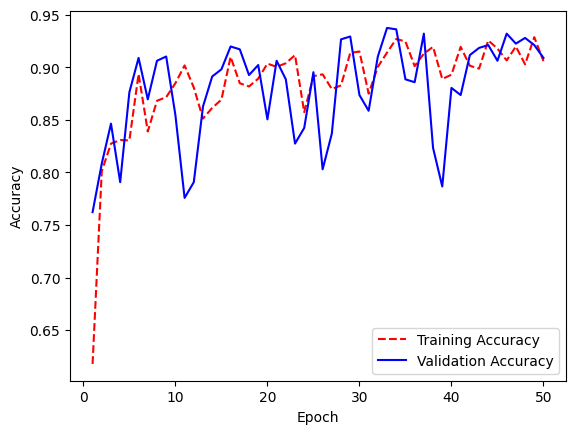

In [150]:
def showAccGraph(model):
  training_loss = model.history['accuracy']
  test_loss = model.history['val_accuracy']
  epoch_count = range(1, len(training_loss) + 1)
  plt.plot(epoch_count, training_loss, 'r--')
  plt.plot(epoch_count, test_loss, 'b-')
  plt.legend(['Training Accuracy', 'Validation Accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show();
showAccGraph(spam_data)

<hr>

**Observation**:

* We can observe here in this graph that as the number of epochs increases, their accuracy also increases. But just like the previous graph, the line is too erratic which is caused by too large learning rate.

<hr>

#### ***OPTIMIZING AND COMPARING THE MODELS:***

* We will compare the activation function "relu" and "sigmoid", and see which activation function gives better results with our dataset.
* We will also adjust the learning rate of our model to reduce the fluctuation of the loss and find the most optimal value in gradient descent.

In [210]:
#relu function with adjusted learning rate
model1opt = tf.keras.models.Sequential([
    tf.keras.layers.Dense(57),
    tf.keras.layers.Dense(38, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [211]:
model1opt.compile(tf.keras.optimizers.Adam(learning_rate = 0.00090),
              loss = "binary_crossentropy",
              metrics=["accuracy"]
              )

In [212]:
spam_data0 = model1opt.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 40, batch_size = 32)

Epoch 1/40
92/92 [==============================] - 1s 5ms/step - loss: 5.5900 - accuracy: 0.5904 - val_loss: 1.6791 - val_accuracy: 0.7133
Epoch 2/40
92/92 [==============================] - 0s 2ms/step - loss: 1.5244 - accuracy: 0.7035 - val_loss: 0.9179 - val_accuracy: 0.6590
Epoch 3/40
92/92 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.7395 - val_loss: 0.5543 - val_accuracy: 0.7908
Epoch 4/40
92/92 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.7670 - val_loss: 0.5326 - val_accuracy: 0.8003
Epoch 5/40
92/92 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7867 - val_loss: 0.5239 - val_accuracy: 0.7908
Epoch 6/40
92/92 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7503 - val_loss: 0.5399 - val_accuracy: 0.7772
Epoch 7/40
92/92 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7850 - val_loss: 0.4810 - val_accuracy: 0.8438
Epoch 8/40
92/92 [==

In [213]:
model1opt.evaluate(X_test, y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8979


[0.33899062871932983, 0.897936999797821]

<hr>

**Observation**:

* Here, we can see that the value of the accuracy and loss has been reduced compared to the first model that we trained. From 93% accuracy, it became 89% and from 25% loss it now became 33%.

<hr>

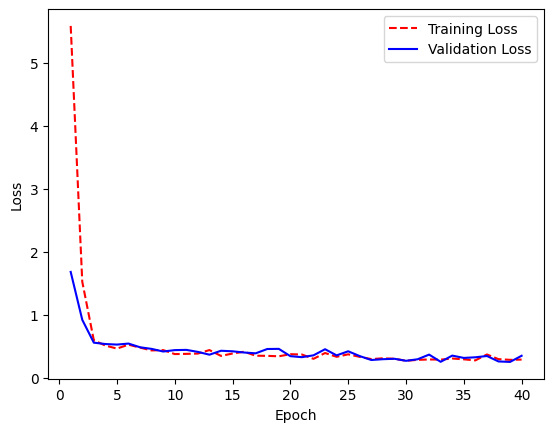

In [214]:
showLossGraph(spam_data0)

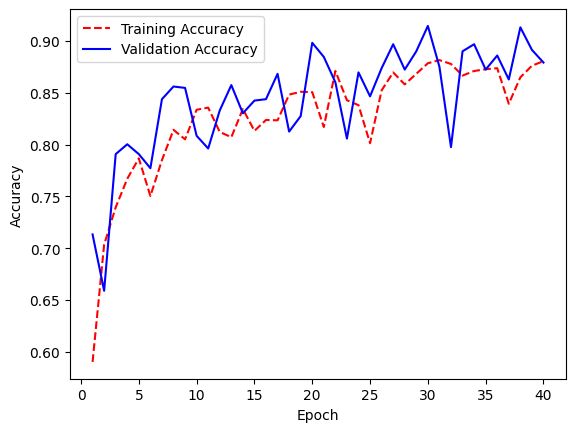

In [215]:
showAccGraph(spam_data0)

<hr>

**Observation**:

* We can observe that the fluctuation in the loss and accuracy of the model has been reduced with the use of dropout and the adjustment of the learning rate. But the accuracy and the loss of the prediction now became lower than their initial value. For now, let's see what will happen if we change the activation function to "sigmoid".

<hr>

**Using Sigmoid  Function as activation function**

In [218]:
#Sigmoid Function with adjusted learning rate
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(57),
    tf.keras.layers.Dense(38, activation = "sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [219]:
model2.compile(tf.keras.optimizers.Adam(learning_rate = 0.00090),
              loss = "binary_crossentropy",
              metrics=["accuracy"]
              )

In [220]:
spam_data = model2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 40, batch_size = 32)

Epoch 1/40
92/92 [==============================] - 1s 7ms/step - loss: 0.6175 - accuracy: 0.6389 - val_loss: 0.5605 - val_accuracy: 0.6481
Epoch 2/40
92/92 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.7334 - val_loss: 0.4482 - val_accuracy: 0.8207
Epoch 3/40
92/92 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.7935 - val_loss: 0.4150 - val_accuracy: 0.8274
Epoch 4/40
92/92 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8387 - val_loss: 0.3439 - val_accuracy: 0.8859
Epoch 5/40
92/92 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8488 - val_loss: 0.3500 - val_accuracy: 0.8356
Epoch 6/40
92/92 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8607 - val_loss: 0.3078 - val_accuracy: 0.8709
Epoch 7/40
92/92 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8556 - val_loss: 0.3398 - val_accuracy: 0.8451
Epoch 8/40
92/92 [==

In [222]:
model2.evaluate(X_test, y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9305


[0.18337643146514893, 0.9305103421211243]

<hr>

**Observation**:

* By observing the values above, we can see that the accuracy and the loss has been improve even after applying the dropout and the adjustment of the learning rate. After changing the activation function to sigmoid, it showed much better performance than using the RelU.

<hr>

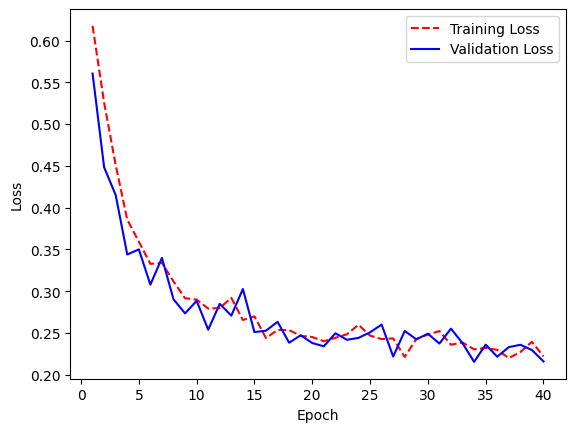

In [221]:
showLossGraph(spam_data)

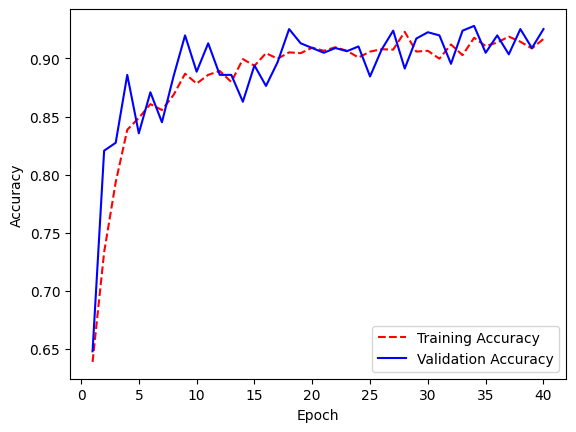

In [223]:
showAccGraph(spam_data)

<hr>

**Observation**:

* From the graph above, we can observe that its fluctuation has been reduced and we can now easily observed its trend. The pattern is also still the same as the past graph, as the epoch increases, the accuracy increases while the loss has been decreasing. This is a good sign because this means that our model actually learns.

<hr>

* We will add a hidden layer with the node of 25 because the hidden layer node should be the 2/3 of the node before it [13].
*  We will try to change the activation function for the hidden layers to sigmoid because I want to compare the results to the model using the RelU activation function. This is an implementation of trial and error.

In [252]:
#Another Optimization of our model
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(57),
    tf.keras.layers.Dense(38, activation = "sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25, activation = "sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [253]:
model3.compile(tf.keras.optimizers.Adam(learning_rate = 0.00090),
              loss = "binary_crossentropy",
              metrics=["accuracy"]
              )

In [254]:
spam_base3 = model3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 40, batch_size = 32)

Epoch 1/40
92/92 [==============================] - 1s 5ms/step - loss: 0.6851 - accuracy: 0.5700 - val_loss: 0.6040 - val_accuracy: 0.6141
Epoch 2/40
92/92 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.6936 - val_loss: 0.5089 - val_accuracy: 0.7052
Epoch 3/40
92/92 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7836 - val_loss: 0.4351 - val_accuracy: 0.8356
Epoch 4/40
92/92 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8149 - val_loss: 0.3946 - val_accuracy: 0.8152
Epoch 5/40
92/92 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8302 - val_loss: 0.3432 - val_accuracy: 0.8764
Epoch 6/40
92/92 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.8590 - val_loss: 0.3018 - val_accuracy: 0.8913
Epoch 7/40
92/92 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8624 - val_loss: 0.3054 - val_accuracy: 0.8736
Epoch 8/40
92/92 [==

In [255]:
model3.evaluate(X_test, y_test)

29/29 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9131


[0.204832524061203, 0.9131379127502441]

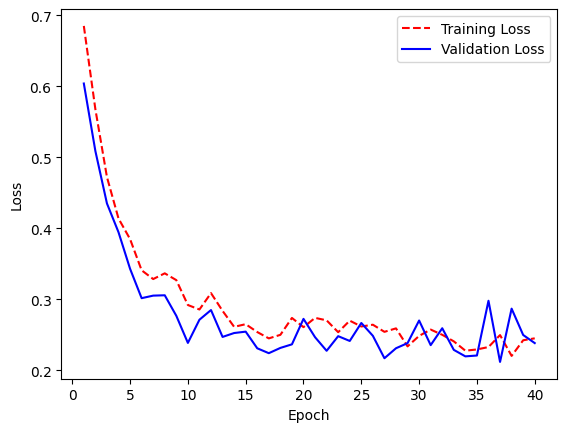

In [256]:
showLossGraph(spam_base3)

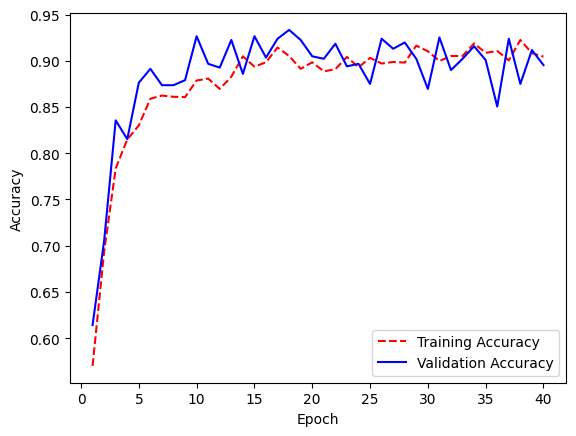

In [257]:
showAccGraph(spam_base3)

<hr>

**Observation**:

* In the data above, we can see that the loss and accuracy has been decreased compared to the previous model with only 1 hidden layer. This shows that having more hidden layers does not mean that it will improve the result of the prediction unless you spend extensive amount of time cleaning and preprocessing the data.

* In conclusion, the model which has 1 hidden layer with 38 attributes and uses sigmoid is the best model based on the results of the evaluation and the graphs.

<hr>

#### ***SUMMARY, LEARNINGS AND CONCLUSION:***

* **Summary**:
* In this activity, I picked a dataset about identifying "spam" and "not spam" messages by using the features which contains the frequency of the words that matches the e-mail. Then after that, I performed exploratory data analysis and checked if there are insights that I can gather from that. The next thing I did was to split the dataset into training, validation and test data. I did not normalize the data because the values of this datasetis within 0-1 frequency percentage. Then, I trained the model with 1 hidden layer and 38 nodes. I successfully created my first model with an accuracy of 93% and loss of 25%. The only problem is that the values are too erratic and it fluctuates. To fix this, I optimized the model by changing the learning rate to 0.00009 and added a dropout regularization technique to further prevent overfitting. The accuracy and loss of our model in test data showed no signs of improvement, so I tried making another model which has the same changes but it utilizes the Sigmoid activation function. This model increased the accuracy to 93% and reduced the loss to 18%, which is a good improvement from the earlier 89% and 33%. For the last model, I tried adding another hidden layer, which in turn decreased the accuracy and increased the loss. This made a point that the most optimal number of hidden layers for this dataset is 1. I've optimized and created models to compare them to each other through trial and error.

* **Learnings**:
* In this activity, I learned how to detect imbalance dataset and what are the possible methods to prevent them. I also learned that correlation of variables do not represent everything since there are non-linearly separable data like my dataset. I also learned how to create a multilayer perceptron and also adjust its parameters to fit the requirements that I need. I also learned how to compare and contrasy different models while also evaluating them at the same time. Using references is also one of the best advice that I learned.

* **Conclusion**:
* To conclude this activity, I learned a lot of fundamental concepts regarding the multilayer perceptron and how they work. I have also understood how to implement different techniques and formulas that are needed to process or activate the node. I have enjoyed this activity and it is quite a challenge to solve it. I will definitely recommend this activity to other students who wants to build their fundamentals in Data Science or machine learning. Overall, this activity is of a great help to me and I hope there are more activities like this in the future.

REFERENCES:

[1]A. Kulkarni, F. Batarseh, and D. Chong, “Chapter 5: Foundations of Data Imbalance and Solutions for a Data Democracy.” Available: https://arxiv.org/ftp/arxiv/papers/2108/2108.00071.pdf

[2]T. Hasanin, T. M. Khoshgoftaar, J. L. Leevy, and R. A. Bauder, “Severely imbalanced Big Data challenges: investigating data sampling approaches,” Journal of Big Data, vol. 6, no. 1, Nov. 2019, doi: https://doi.org/10.1186/s40537-019-0274-4.

[3]“Machine Learning Glossary,” Google for Developers. https://developers.google.com/machine-learning/glossary#positive_class (accessed Mar. 23, 2024).

[4]“Machine Learning Glossary,” Google for Developers. https://developers.google.com/machine-learning/glossary#negative_class (accessed Mar. 23, 2024).

[5]“Machine Learning Glossary,” Google for Developers. https://developers.google.com/machine-learning/glossary#class-imbalanced-dataset (accessed Mar. 23, 2024).

[6]Kent State University, “LibGuides: SPSS Tutorials: Pearson Correlation,” Kent.edu, 2018. https://libguides.library.kent.edu/SPSS/PearsonCorr

[7]“Training and Test Sets: Splitting Data  |  Machine Learning Crash Course,” Google Developers, 2019. https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

[8]“Machine Learning Glossary,” Google for Developers. https://developers.google.com/machine-learning/glossary#validation_set (accessed Mar. 24, 2024).


[9]I. Guyon, “A scaling law for the validation-set training-set size ratio.” Accessed: Nov. 05, 2023. [Online]. Available: https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=452e6c05d46e061290fefff8b46d0ff161998677

[10]“Splitting into train, dev and test sets,” cs230.stanford.edu. https://cs230.stanford.edu/blog/split/


[11]“Neural Networks: Structure | Machine Learning Crash Course,” Google Developers. https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/anatomy

[12]J. Brownlee, “Weight Initialization for Deep Learning Neural Networks,” Machine Learning Mastery, Feb. 02, 2021. https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/


[13]S. Karsoliya, “Approximating Number of Hidden layer neurons in Multiple Hidden Layer BPNN Architecture,” 2012. Accessed: Mar. 24, 2024. [Online]. Available: https://ijettjournal.org/volume-3/issue-6/IJETT-V3I6P206.pdf

[14]I. Goodfellow, Y. Bengio, and A. Courville, Deep Learning. MIT Press, 2016

[15]N. Srivastava, G. Hinton, A. Krizhevsky, I. Sutskever, R. Salakhutdinov, and Y. Bengio, “Dropout: A Simple Way to Prevent Neural Networks from Overfitting,” Journal of Machine Learning Research, vol. 15, pp. 1929–1958, 2014, Available: https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

[16]Y. Bengio, “Practical Recommendations for Gradient-Based Training of Deep Architectures,” 2012. Available: https://arxiv.org/pdf/1206.5533.pdf
‌




LINK FOR DATASET:

* Hopkins,Mark, Reeber,Erik, Forman,George, and Suermondt,Jaap. (1999). Spambase. UCI Machine Learning Repository. https://doi.org/10.24432/C53G6X.